In [17]:
from validator.InstanceCO22 import InstanceCO22
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
testfile = "./Instances/Instance_1-10/Instance_2.txt"

In [21]:
instance = InstanceCO22(inputfile = testfile, filetype = 'txt')
instance.Hubs

[hub 1 with cost 0 and allowed requests 123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100,
 hub 2 with cost 0 and allowed requests 123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100,
 hub 3 with cost 0 and allowed requests 123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100,
 hub 4 with cost 0 and allowed requests 123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100,
 hub 5 with cost 0 and allowed requests 123456789101112131415161

In [22]:
def plotInstance(instance):
    plt.figure(figsize=(7,7))
    locX = [_.X for _ in instance.Locations]
    locY = [_.Y for _ in instance.Locations]
    nHubs = len(instance.Hubs)
    plt.scatter(locX[0], locY[0], marker=",", label="Depot")
    plt.scatter(locX[1:1+nHubs], locY[1:1+nHubs],marker="^", label="Hub")
    plt.scatter(locX[1+nHubs:], locY[1+nHubs:],marker='.')
    plt.legend()

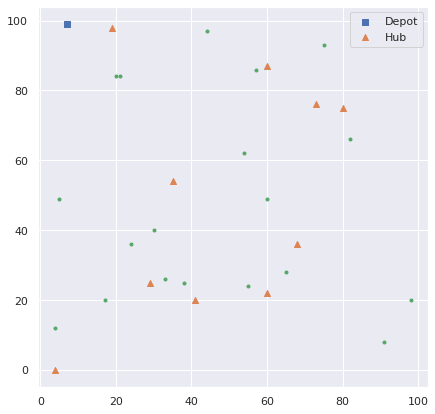

In [23]:
plotInstance(instance)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=753de76d-10e8-4df1-99e9-23420669c377' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>